# Project Overview
Our project is to review a mobile usage dataset and explore how mobile phones are being used and the behaviours of their owners. Our dataset is downloaded from Kaggle: https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset?resource=download

# Data Dictionary

User ID: Unique identifier for each user.

Device Model: Model of the user's smartphone.

Operating System: The OS of the device (iOS or Android).

App Usage Time: Daily time spent on mobile applications, measured in minutes.

Screen On Time: Average hours per day the screen is active.

Battery Drain: Daily battery consumption in mAh.

Number of Apps Installed: Total apps available on the device.

Data Usage: Daily mobile data consumption in megabytes.

Age: Age of the user.

Gender: Gender of the user (Male or Female).

User Behavior Class: Classification of user behavior based on usage patterns (1 to 5).

# Library importation

In [113]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import ttest_ind
from scipy.stats import f_oneway, ttest_ind

In [114]:
!python -m pip install seaborn

In [115]:
# Load data

In [116]:
df = pd.read_csv("user_behavior_dataset.csv",
                low_memory=False)


# Exploratory Data Analysis

In [117]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [118]:
df.tail()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1
699,700,OnePlus 9,Android,212,5.4,1306,49,828,23,Female,3


In [119]:
df.shape

(700, 11)

In [120]:
# Check if there are duplicates
def drop_duplicates(df, columns=None): 
	if columns == None: 
		df.drop_duplicates(inplace=True) 
	else: 
		df.drop_duplicates(subset = columns, inplace=False)
	return df 

In [121]:
# Drop duplicates
df2 = drop_duplicates(df)
print(df2)

     User ID        Device Model Operating System  App Usage Time (min/day)  \
0          1      Google Pixel 5          Android                       393   
1          2           OnePlus 9          Android                       268   
2          3        Xiaomi Mi 11          Android                       154   
3          4      Google Pixel 5          Android                       239   
4          5           iPhone 12              iOS                       187   
..       ...                 ...              ...                       ...   
695      696           iPhone 12              iOS                        92   
696      697        Xiaomi Mi 11          Android                       316   
697      698      Google Pixel 5          Android                        99   
698      699  Samsung Galaxy S21          Android                        62   
699      700           OnePlus 9          Android                       212   

     Screen On Time (hours/day)  Battery Drain (mAh

In [122]:
df2.shape

(700, 11)

In [123]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [124]:
# Check for missing values
df2.isna().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [125]:
# Check for unique values in each column
df2.nunique()

User ID                       700
Device Model                    5
Operating System                2
App Usage Time (min/day)      387
Screen On Time (hours/day)    108
Battery Drain (mAh/day)       628
Number of Apps Installed       86
Data Usage (MB/day)           585
Age                            42
Gender                          2
User Behavior Class             5
dtype: int64

In [126]:
df2.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

In [127]:
df2.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


# Outlier Analysis for the columns

### Outlier Analysis for User ID:

Minimum (min): 1

Maximum (max): 700

IQR (Q3 - Q1): 525.25−175.75=349.5

Lower Bound: Q1−1.5×IQR=175.75−1.5×349.5=−349.5

Upper Bound: Q3+1.5×IQR=525.25+1.5×349.5=1050.5  

Since the minimum and maximum values (1 and 700) fall within this range, there are no outliers for the User ID column using the IQR method.

The data looks uniformly distributed with no unusual spikes or gaps.

The mean (350.5) matches the 50th percentile (median, 350.5), indicating a symmetric distribution.


### Outlier Analysis for App Usage Time (min/day)

IQR (Q3 - Q1): 434.25−113.25=321.0   434.25 - 113.25 = 321.0434.25−113.25=321.0
Lower Bound: Q1−1.5×IQR=113.25−1.5×321=−368.25  (negative, so not relevant)
Upper Bound: Q3+1.5×IQR=434.25+1.5×321=915.75           

Observations:

Minimum: 30 (above the lower bound)
Maximum: 598 (below the upper bound)

No outliers.


### Outlier Analysis for Screen On Time

IQR: 7.4−2.5=4.97.4 - 2.5 = 4.97.4−2.5=4.9
Lower Bound: Q1−1.5×IQR=2.5−1.5×4.9=−4.85 (negative, so not relevant)
Upper Bound: Q3+1.5×IQR=7.4+1.5×4.9=14.75   

Observations:

Minimum: 1 (above the lower bound)
Maximum: 12 (below the upper bound)

No outliers.


### Outlier Analysis for Battery Drain (mAh/day)

IQR: 2229.5−722.25=1507.252229.5 - 722.25 = 1507.25    
Lower Bound: Q1−1.5×IQR=722.25−1.5×1507.25=−1538.625 (negative, so not relevant)
Upper Bound: Q3+1.5×IQR=2229.5+1.5×1507.25=4490.375

Observations:

Minimum: 302 (above the lower bound)
Maximum: 2993 (below the upper bound)

No outliers.


### Outlier Analysis for Number of Apps Installed

IQR: 74−26=4874 - 26 = 4874−26=48
Lower Bound: Q1−1.5×IQR=26−1.5×48=−46 (negative, so not relevant)
Upper Bound: Q3+1.5×IQR=74+1.5×48=146

Observations:

Minimum: 10 (above the lower bound)
Maximum: 99 (below the upper bound)

No outliers.


### Outlier Analysis for Data Usage (MB/day)

IQR: 1341−373=9681341 - 373 = 9681341−373=968
Lower Bound: Q1−1.5×IQR=373−1.5×968=−1079 (negative, so not relevant)
Upper Bound: Q3+1.5×IQR=1341+1.5×968=2793

Observations:

Minimum: 102 (above the lower bound)
Maximum: 2497 (below the upper bound)

No outliers.


### Outlier Analysis for Age

IQR: 49−28=2149 - 28 = 2149−28=21
Lower Bound: Q1−1.5×IQR=28−1.5×21=−3.5 (negative, so not relevant)
Upper Bound: Q3+1.5×IQR=49+1.5×21=80.5

Observations:

Minimum: 18 (above the lower bound)
Maximum: 59 (below the upper bound)

No outliers.


### Outlier Analysis for User Behavior Class

IQR: 4−2=24 - 2 = 24−2=2
Lower Bound: Q1−1.5×IQR=2−1.5×2=−1
Upper Bound: Q3+1.5×IQR=4+1.5×2= 7

Observations:

Minimum: 1 (above the lower bound)
Maximum: 5 (below the upper bound)

No outliers.


### Final Conclusion
Based on the IQR method applied to the summary statistics, none of the columns in the dataset have outliers. All the values fall within the calculated lower and upper bounds for their respective features.



### Visualize distribution of numerical features

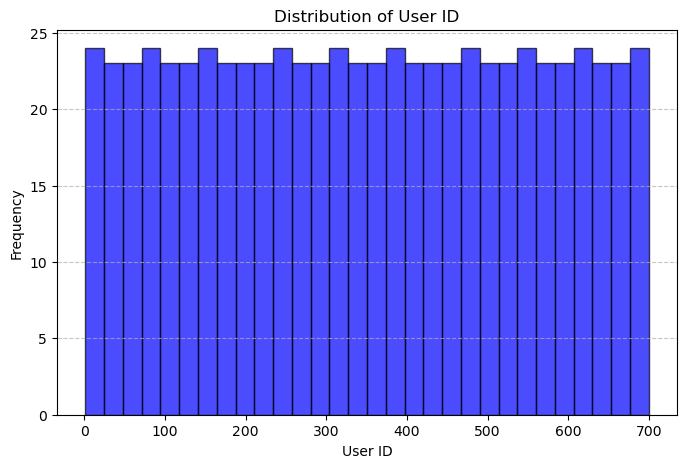

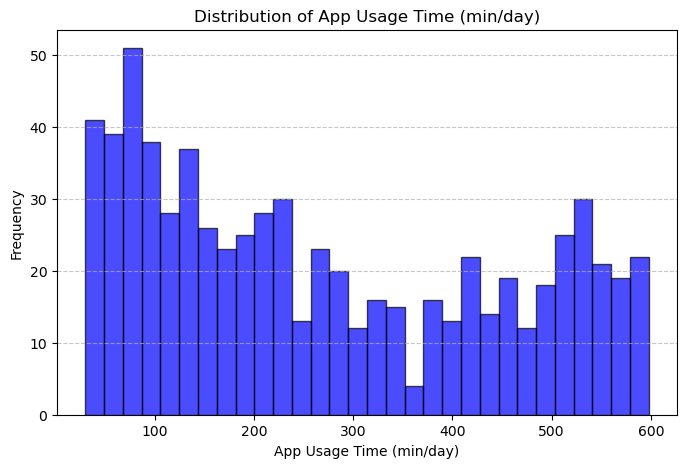

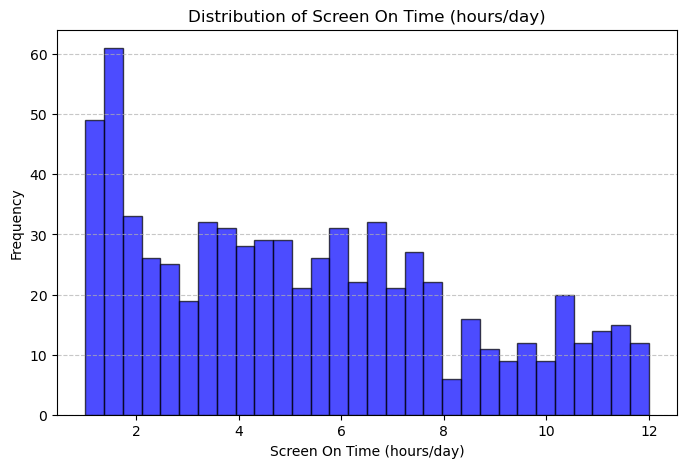

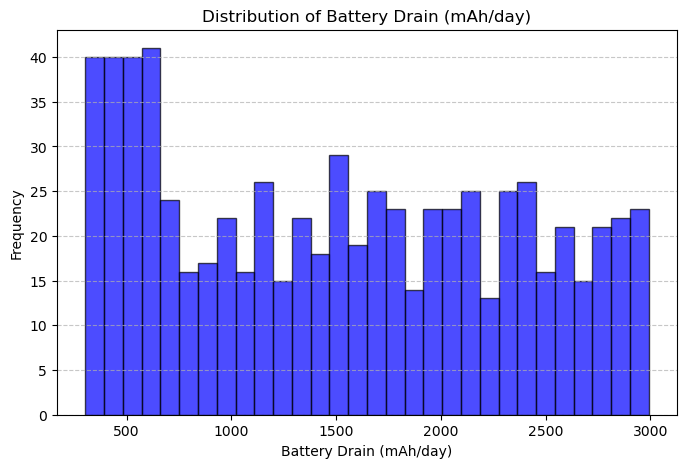

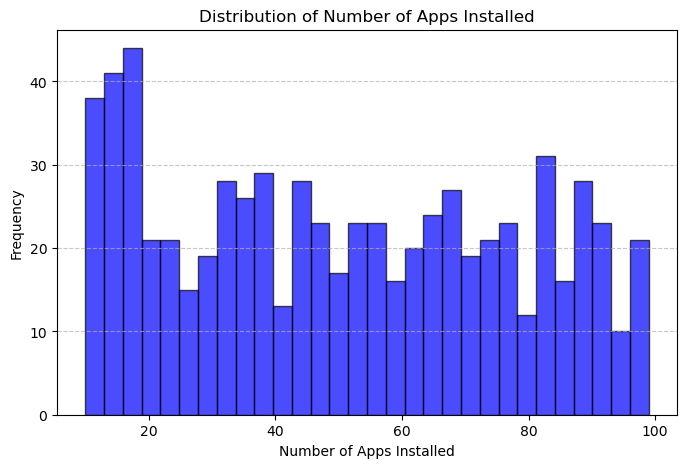

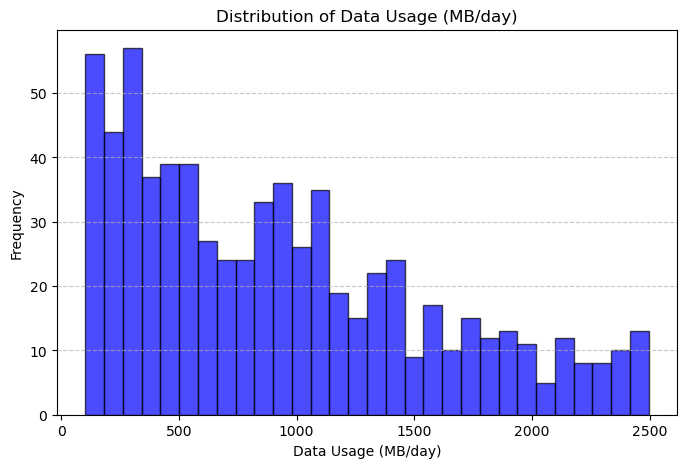

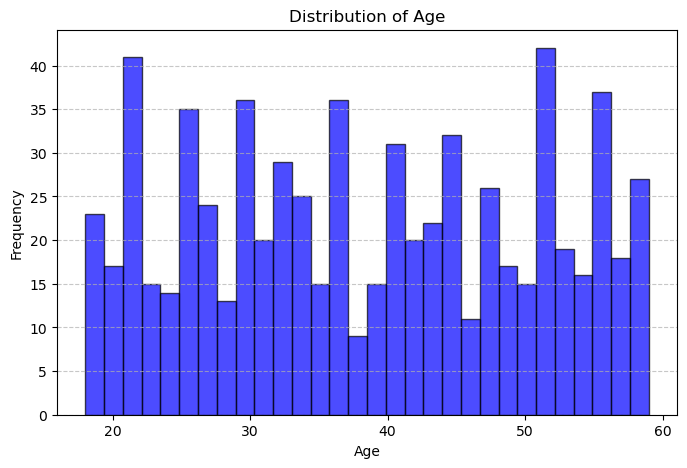

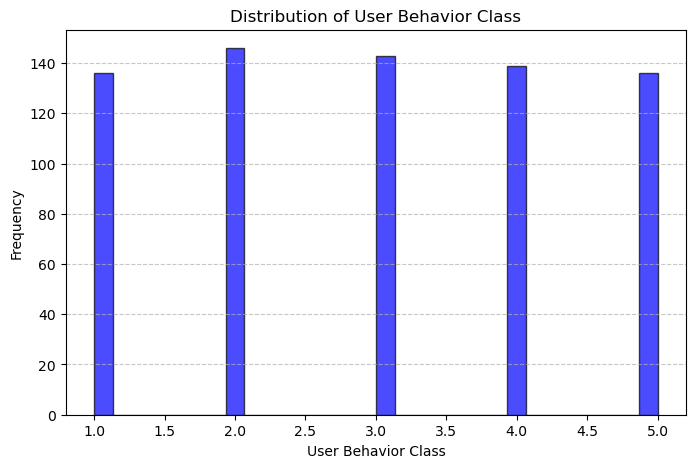

In [128]:

# Select numeric columns
%matplotlib inline
numeric_columns = df2.select_dtypes(include=['float64', 'int64']).columns

# Loop through numeric columns and create histograms
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(df2[col], bins=30, color='blue', edgecolor='black', alpha=0.7)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

### Categorical Columns in the Dataset:
1. Device Model

2. Operating System

3. Gender

4. User Behavior Class (because despite being stored as int64, it represents categories). While it's represented numerically, this column is conceptually categorical, as it likely represents distinct groups or categories (e.g., classes 1, 2, 3, 4, 5) rather than continuous numeric values.

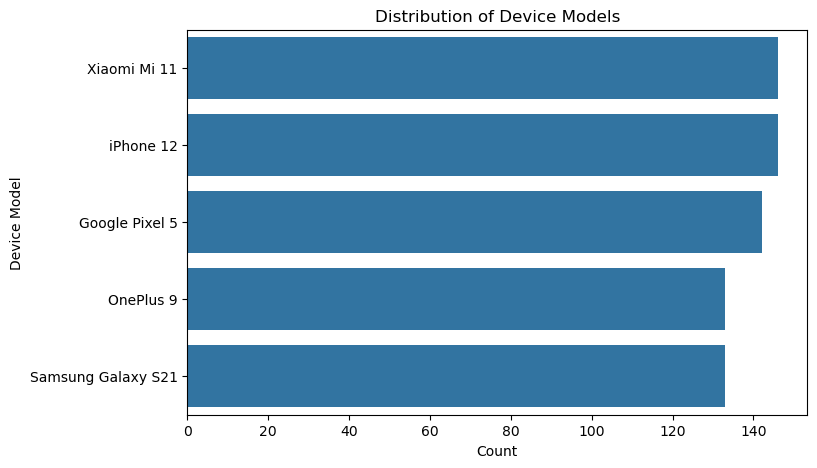

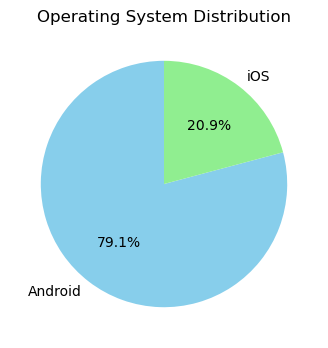

C:\Users\araba\AppData\Local\Temp\ipykernel_4368\140043245.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df2, palette='pastel')


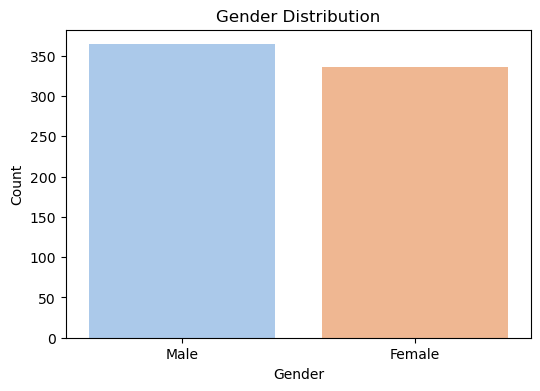

C:\Users\araba\AppData\Local\Temp\ipykernel_4368\140043245.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='User Behavior Class', data=df2, palette='muted')


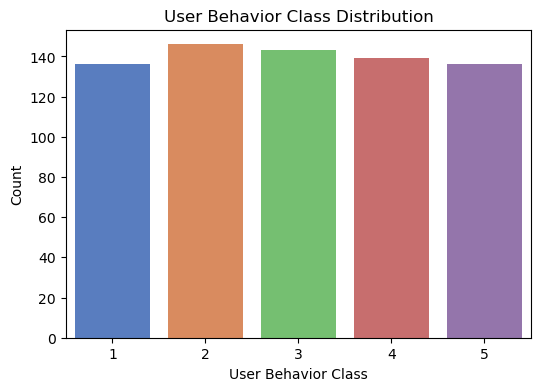

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing Device Model Distribution
plt.figure(figsize=(8, 5))
sns.countplot(y='Device Model', data=df2, order=df2['Device Model'].value_counts().index)
plt.title('Distribution of Device Models')
plt.xlabel('Count')
plt.ylabel('Device Model')
plt.show()

# Visualizing Operating System Distribution
plt.figure(figsize=(6, 4))
df2['Operating System'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Operating System Distribution')
plt.ylabel('')  # Remove y-label for aesthetics
plt.show()

# Visualizing Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df2, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Visualizing User Behavior Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='User Behavior Class', data=df2, palette='muted')
plt.title('User Behavior Class Distribution')
plt.xlabel('User Behavior Class')
plt.ylabel('Count')
plt.show()


Next, we will check to make sure each of the categories have no errors or inconsistencies

In [130]:
for col in ['Device Model', 'Operating System', 'Gender', 'User Behavior Class']:
    print(f"Unique values in {col}:")
    print(df2[col].unique())
    print("\n")

Unique values in Device Model:
['Google Pixel 5' 'OnePlus 9' 'Xiaomi Mi 11' 'iPhone 12'
 'Samsung Galaxy S21']


Unique values in Operating System:
['Android' 'iOS']


Unique values in Gender:
['Male' 'Female']


Unique values in User Behavior Class:
[4 3 2 5 1]




### Conclusion: All categorical columns are clean, with no typos, missing data, or unexpected categories.


### User Behavior Class Analysis

C:\Users\araba\AppData\Local\Temp\ipykernel_4368\3818865348.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='User Behavior Class', data=df2, palette='viridis')


Value Counts for User Behavior Class:
User Behavior Class
1    136
2    146
3    143
4    139
5    136
Name: count, dtype: int64

Proportion of Each Class:
User Behavior Class
1    19.428571
2    20.857143
3    20.428571
4    19.857143
5    19.428571
Name: count, dtype: float64


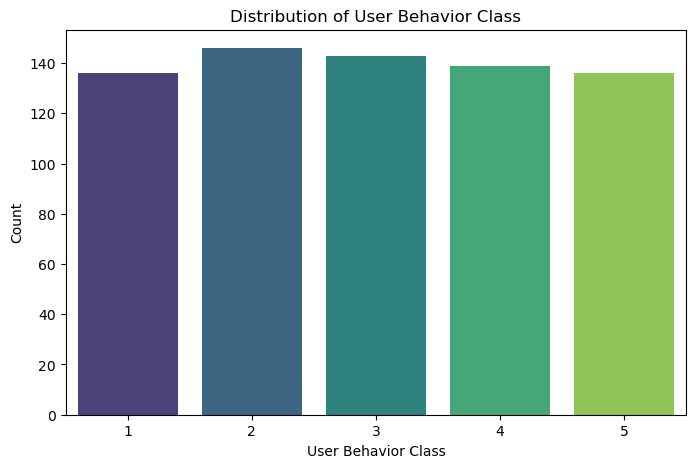

In [131]:
#  Summary Metrics for User Behavior Class (counts, proportions, and visualization)
# Summary of User Behavior Class
behavior_summary = df2['User Behavior Class'].value_counts().sort_index()

# Display summary metrics
print("Value Counts for User Behavior Class:")
print(behavior_summary)

# Proportion of each class
print("\nProportion of Each Class:")
print(behavior_summary / len(df2) * 100)

# Visualize the distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='User Behavior Class', data=df2, palette='viridis')
plt.title('Distribution of User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel('Count')
plt.show()



Descriptive Statistics for Data Usage by User Behavior Class:
                     count         mean         std     min      25%     50%  \
User Behavior Class                                                            
1                    136.0   202.323529   61.419129   102.0   146.00   202.0   
2                    146.0   451.417808   90.600507   301.0   370.25   450.0   
3                    143.0   822.013986  114.221121   608.0   720.50   828.0   
4                    139.0  1232.230216  146.192266  1002.0  1096.00  1209.0   
5                    136.0  1974.772059  297.455106  1508.0  1715.00  1935.0   

                        75%     max  
User Behavior Class                  
1                     262.5   299.0  
2                     533.5   599.0  
3                     915.5   997.0  
4                    1359.5  1499.0  
5                    2192.5  2497.0  


C:\Users\araba\AppData\Local\Temp\ipykernel_4368\3979311466.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='User Behavior Class', y='Data Usage (MB/day)', data=df2, palette='coolwarm')


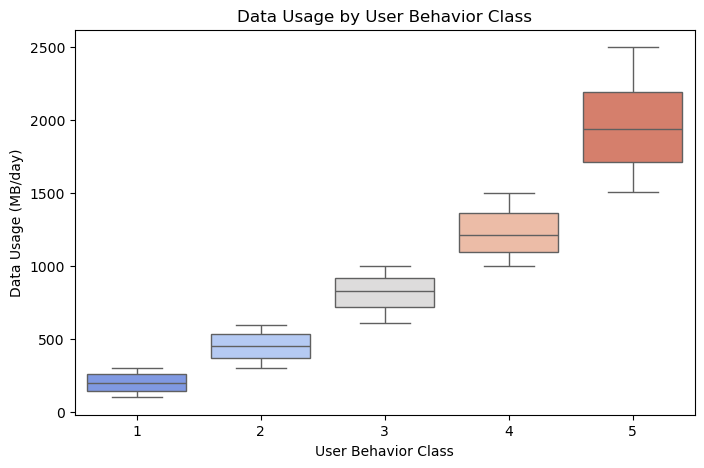

In [132]:
# Descriptive Statistics for Data Usage Across Classes
# Group by User Behavior Class and calculate summary statistics
data_usage_summary = df2.groupby('User Behavior Class')['Data Usage (MB/day)'].describe()
print("\nDescriptive Statistics for Data Usage by User Behavior Class:")
print(data_usage_summary)

# Boxplot for Data Usage
plt.figure(figsize=(8, 5))
sns.boxplot(x='User Behavior Class', y='Data Usage (MB/day)', data=df2, palette='coolwarm')
plt.title('Data Usage by User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel('Data Usage (MB/day)')
plt.show()


### Key Observations:

Increasing Data Usage Across Classes:

User Behavior Class 1: These users exhibit the lowest data usage, with a median below 500 MB/day and a small interquartile range (IQR), indicating consistent, minimal data consumption.

User Behavior Class 2: Data usage increases, with a median around 750 MB/day. The IQR is slightly larger, indicating more variation in data usage.

User Behavior Class 3: The median data usage approaches 1,000 MB/day, with slightly broader variation compared to Class 2.

User Behavior Class 4: Median data usage rises further to around 1,500 MB/day, with a wider spread than lower classes.

User Behavior Class 5: These users show the highest data usage, with a median exceeding 2,000 MB/day and a large IQR, suggesting significant variability in how much data these users consume.

Distinct Separation Between Classes:

There is a clear upward trend in data usage with increasing user behavior class, with minimal overlap in data usage between adjacent classes. This indicates a strong relationship between user behavior and data consumption.

Variation in Data Usage:

Lower classes (1 and 2) have smaller ranges and less variability in data usage.

Higher classes (4 and 5) exhibit broader ranges, reflecting diverse behaviors and data needs among users in these groups.

### Interpretation:

Data Usage as a Key Predictor:

The upward trend suggests that Data Usage (MB/day) is a reliable indicator of user behavior class. Users with higher data consumption are more likely to belong to higher behavior classes, reflecting their intensive mobile usage patterns.

Segmentation Insights:

Class 1 and 2 (Light and Moderate Users): These users are likely engaged in basic tasks with minimal data consumption.

Class 3 and 4 (Active and Heavy Users): These users are transitioning to more data-intensive tasks.

Class 5 (Power Users): This group represents the most demanding users, who likely rely on mobile devices for data-heavy activities. 

In [133]:
# Convert User Behavior Class to Categorical
df2['User Behavior Class'] = df2['User Behavior Class'].astype('category')

# Verify the conversion
print("\nAfter Conversion, Data Type of User Behavior Class:")
print(df2['User Behavior Class'].dtype)


After Conversion, Data Type of User Behavior Class:
category


In [134]:
### Add Category Labels
# Let's add meaningful labels
df2['User Behavior Class'] = df2['User Behavior Class'].cat.rename_categories({
    1: 'Light User',
    2: 'Moderate User',
    3: 'Active User',
    4: 'Heavy User',
    5: 'Power User'
})

# Check updated categories
print("\nUpdated Categories in User Behavior Class:")
print(df2['User Behavior Class'].cat.categories)



Updated Categories in User Behavior Class:
Index(['Light User', 'Moderate User', 'Active User', 'Heavy User',
       'Power User'],
      dtype='object')


In [135]:
# Get unique categories and counts
print("\nCategories in User Behavior Class:")
print(df2['User Behavior Class'].cat.categories)

# Check for missing values
print("\nMissing Values in User Behavior Class:")
print(df2['User Behavior Class'].isnull().sum())


Categories in User Behavior Class:
Index(['Light User', 'Moderate User', 'Active User', 'Heavy User',
       'Power User'],
      dtype='object')

Missing Values in User Behavior Class:
0


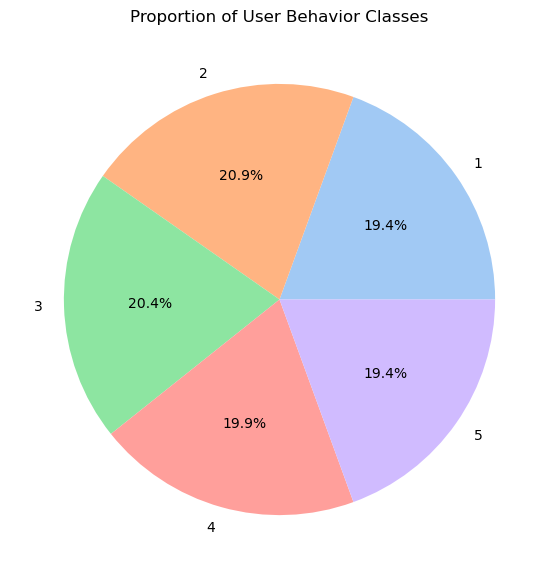

In [136]:
# Visualize Class Proportions and Relationships
# Pie chart of proportions
behavior_summary.plot.pie(autopct='%1.1f%%', figsize=(7, 7), colors=sns.color_palette('pastel'))
plt.title('Proportion of User Behavior Classes')
plt.ylabel('')
plt.show()


C:\Users\araba\AppData\Local\Temp\ipykernel_4368\462900884.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='User Behavior Class', y='Battery Drain (mAh/day)', data=df2, palette='muted')


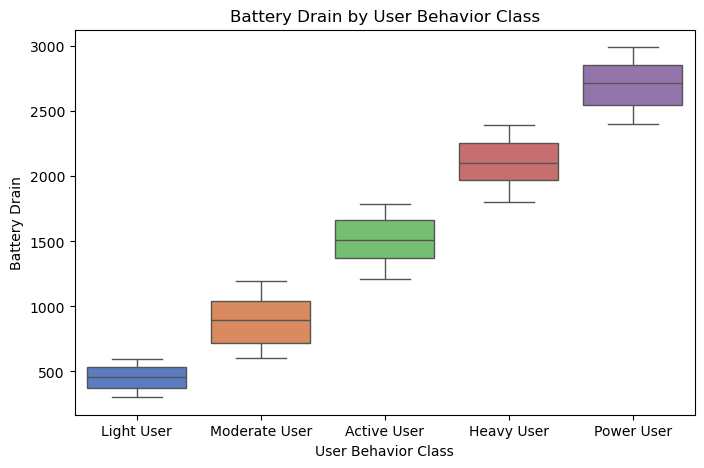

In [137]:
# Analyzing Battery Drain or Screen On Time across classes:
# Battery Drain by User Behavior Class
plt.figure(figsize=(8, 5))
sns.boxplot(x='User Behavior Class', y='Battery Drain (mAh/day)', data=df2, palette='muted')
plt.title('Battery Drain by User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel('Battery Drain')
plt.show()

### Key Observations:

Battery Drain Increases with User Behavior Class:

There is a clear, upward trend in battery drain as the user behavior class increases.
This suggests that heavier users consume more battery due to increased device usage and resource-intensive activities.

Median Battery Drain:

Light Users: Have the lowest median battery drain, around 500 mAh/day.

Moderate Users: Show a moderate increase, with a median near 1,000 mAh/day.

Active Users: Have a median battery drain of around 1,500 mAh/day.

Heavy Users: Show higher battery drain, with a median around 2,000 mAh/day.

Power Users: Exhibit the highest median battery drain, exceeding 2,500 mAh/day.

Range and Variability:

The variability (interquartile range) of battery drain increases slightly as user behavior class increases.

Light Users: Very consistent battery usage with a narrow range.

Power Users: More variability, indicating diverse usage patterns among the heaviest users.

Distinct Separation Between Classes:

There is minimal overlap in battery drain between adjacent user behavior classes, showing clear differentiation in battery consumption patterns among the classes.

### Interpretation:

Battery Drain as a Key Indicator of User Behavior:

The graph strongly supports the idea that battery drain is a reliable predictor of user behavior class. Users in higher classes consume more battery due to longer screen-on time, more app usage, or other resource-heavy activities.

On the other hand, Light Users have minimal battery drain.

# Do the features in the dataset correlate with each other?

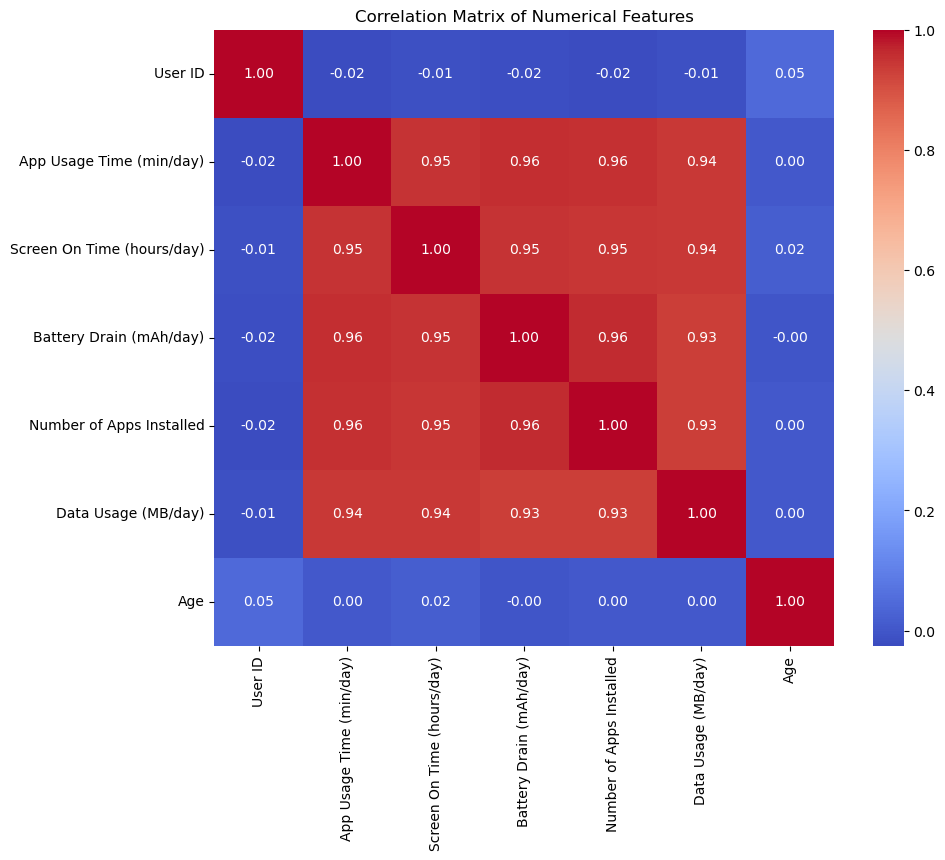

In [138]:
# Select only numerical columns
numeric_columns = df2.select_dtypes(include=['number'])

# Generate the correlation matrix
corr_matrix = numeric_columns.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


### Heatmap Results
The heatmap represents the Pearson correlation coefficients between the columns in your dataset. 

### Key Observations:
Diagonal Values (1.00): Every variable has a perfect correlation with itself, resulting in a value of 1.00 along the diagonal.

1. High Positive Correlations:

App Usage Time (min/day), Screen On Time (hours/day), Battery Drain (mAh/day), Number of Apps Installed, and Data Usage (MB/day) show very high correlations (values above 0.9).
This suggests that these variables are strongly related.
For instance, Battery Drain increases as App Usage Time or Screen On Time increases, which is reasonable because higher app usage and screen time generally drain more battery. Similarly, the number of apps installed correlates with both Data Usage and App Usage Time.

2. Low or Negative Correlations:

Age and User ID show weak or no correlation with other features. This could mean they have little impact on the relationships between other variables.

Uncorrelated Features:

Age and User ID appear to have little predictive value based on correlation alone. 

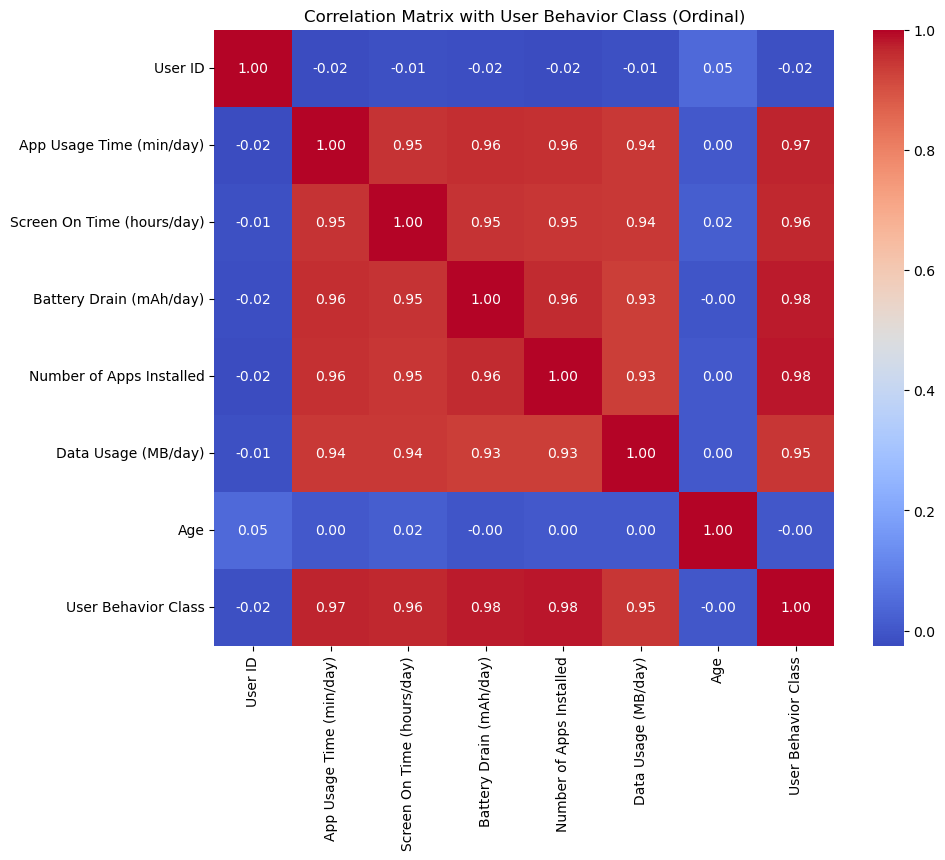

In [139]:
# Temporarily encode User Behavior Class as ordinal for correlation matrix
df2['User Behavior Class (Ordinal)'] = df2['User Behavior Class'].cat.codes

# Include the ordinal column for the correlation matrix
numeric_with_behavior = numeric_columns.copy()
numeric_with_behavior['User Behavior Class'] = df2['User Behavior Class (Ordinal)']

# Generate correlation matrix
corr_matrix_with_behavior = numeric_with_behavior.corr()

# Visualize the correlation matrix with User Behavior Class
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_with_behavior, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix with User Behavior Class (Ordinal)')
plt.show()

# Drop the temporary ordinal column after analysis
df.drop('User Behavior Class (Ordinal)', axis=1, inplace=True)


This correlation matrix provides insights into the relationships between numerical variables and the encoded User Behavior Class. 

### Key Observations:

Strong Correlation Between User Behavior Class and Numerical Variables:

App Usage Time (min/day): Correlation of 0.97 indicates a very strong positive relationship. As app usage time increases, the User Behavior Class tends to increase.

Screen On Time (hours/day): Correlation of 0.96, again showing a very strong positive relationship. Users who spend more time with their screens on are more likely to belong to higher behavior classes.

Battery Drain (mAh/day): Correlation of 0.98, the strongest relationship in this matrix. This suggests that battery consumption significantly increases with higher User Behavior Classes

Number of Apps Installed: Correlation of 0.98, showing that users in higher behavior classes have significantly more apps installed on their devices.

Data Usage (MB/day): Correlation of 0.95, indicating higher data usage is also closely tied to higher behavior classes.

Weak or No Correlation with Age:

Age has almost no correlation with User Behavior Class (~0.00). This suggests that behavior classes are not influenced by the age of users in this dataset.

### Interrelationships Among Features:

App Usage Time, Screen On Time, Battery Drain, Number of Apps Installed, and Data Usage are all highly interrelated (correlations above 0.93). This indicates that these features are likely driving similar user behaviors, such as more intensive device usage.

Implications for Analysis:

Dominant Features for Predicting User Behavior Class:

Features like Battery Drain, App Usage Time, and Number of Apps Installed are likely the most predictive of user behavior. 

Age is Not a Factor:

Since Age shows no significant correlation with User Behavior Class, it can be excluded from predictive models targeting user behaviors.

Highly Correlated Variables:

The strong correlations among multiple features suggest potential multicollinearity. 


In [140]:
df2.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

# Most popular devices based on user age & gender.

In [153]:
# Group by Device Model and Gender and count occurrences
device_summary = df2.groupby(['Device Model', 'Gender', 'Age']).size().reset_index(name='Count')

# Sort by count to find the most popular devices
most_popular_devices = device_summary.sort_values(by='Count', ascending=False)

# Display the top results
print("Most Popular Devices by Age and Gender:")
print(most_popular_devices.head(10))

Most Popular Devices by Age and Gender:
           Device Model  Gender  Age  Count
230        Xiaomi Mi 11  Female   49      6
336           iPhone 12    Male   56      6
132           OnePlus 9    Male   51      6
201  Samsung Galaxy S21    Male   55      5
214        Xiaomi Mi 11  Female   27      5
38       Google Pixel 5    Male   22      5
231        Xiaomi Mi 11  Female   50      5
129           OnePlus 9    Male   47      5
14       Google Pixel 5  Female   36      5
304           iPhone 12  Female   57      5


C:\Users\araba\AppData\Local\Temp\ipykernel_4368\2661515583.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = most_popular_devices.groupby(['age_group', 'Gender', 'Device Model'], as_index=False)['Count'].sum()
C:\Users\araba\AppData\Local\Temp\ipykernel_4368\2661515583.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_data = aggregated_data.pivot_table(


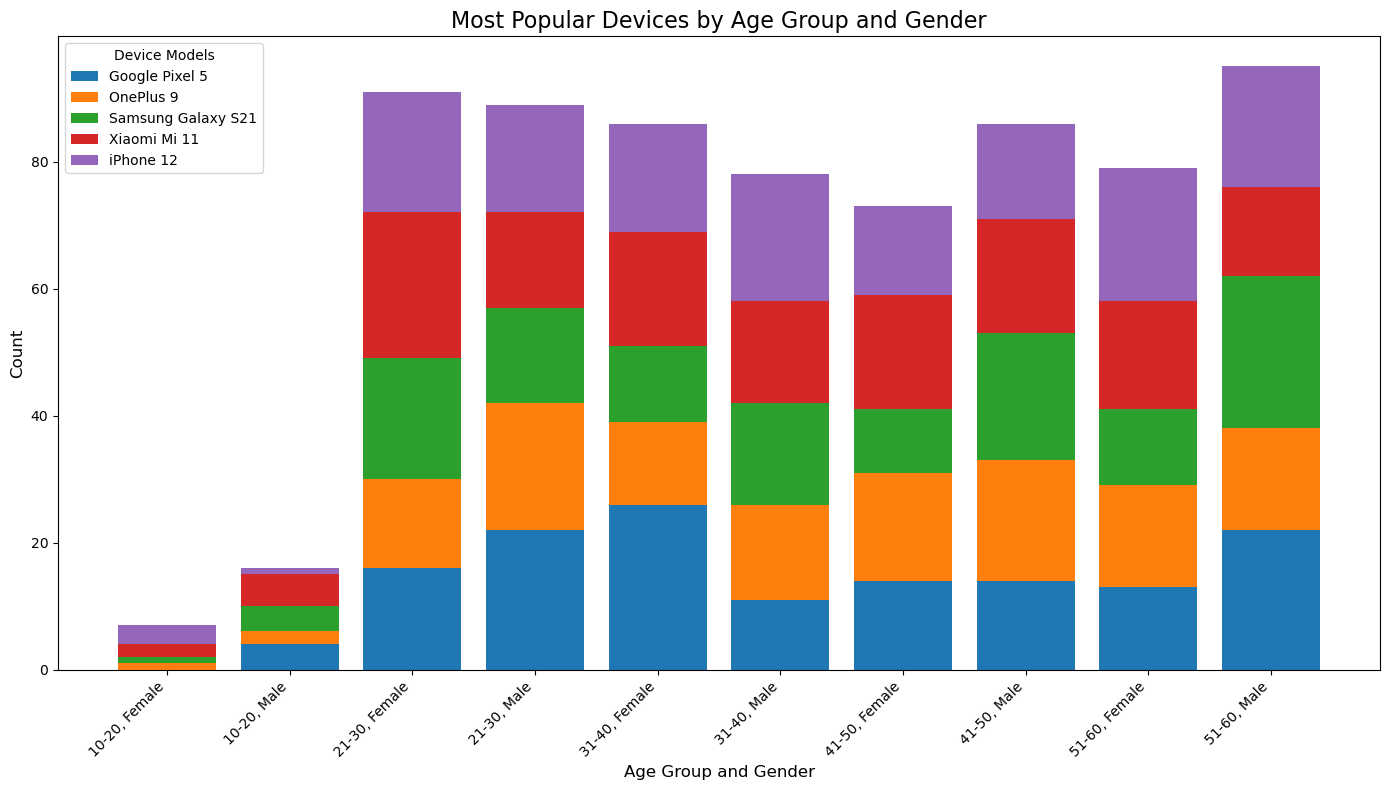

In [142]:
# Bin ages into groups
bins = [10, 20, 30, 40, 50, 60]
labels = ["10-20", "21-30", "31-40", "41-50", "51-60"]
most_popular_devices['age_group'] = pd.cut(most_popular_devices['Age'], bins=bins, labels=labels, right=False)

# Aggregate data by model, age group, and gender
aggregated_data = most_popular_devices.groupby(['age_group', 'Gender', 'Device Model'], as_index=False)['Count'].sum()

# Pivot data for bar chart
pivot_data = aggregated_data.pivot_table(
    index=['age_group', 'Gender'],
    columns='Device Model',
    values='Count',
    fill_value=0
)

# Flatten the MultiIndex for easier access
pivot_data.reset_index(inplace=True)

# Stacked bar chart
age_gender_labels = pivot_data['age_group'].astype(str) + ', ' + pivot_data['Gender']
device_models = pivot_data.columns[2:]  # All device models start from column 2

plt.figure(figsize=(14, 8))

# Create bars for each model
bottom = None
for model in device_models:
    if bottom is None:
        bottom = pivot_data[model]
        plt.bar(age_gender_labels, pivot_data[model], label=model)
    else:
        plt.bar(age_gender_labels, pivot_data[model], bottom=bottom, label=model)
        bottom += pivot_data[model]

# Customize the chart
plt.title('Most Popular Devices by Age Group and Gender', fontsize=16)
plt.xlabel('Age Group and Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Device Models')
plt.tight_layout()

# Show the chart
plt.show()

This graph visualizes the most popular devices used by different age groups and genders. 

### Graph interpretation:

X-Axis Categories: The x-axis represents a combination of age groups (e.g., 10-20, 21-30, etc.) and gender (Male, Female).

Y-Axis Values: The y-axis shows the count of users for each device model within each category.

Stacked Bars: Each stacked bar represents the distribution of device models (e.g., Google Pixel 5, iPhone 12) used by that age and gender group. The colors correspond to specific device models, as indicated in the legend.

Key Observations:
Age and Gender Distribution:

The 21-30 and 31-40 age groups have the highest counts for both males and females, indicating higher engagement with mobile devices in these age ranges.
The 10-20 age group has the lowest representation for both genders.
Device Preferences:

Across all age groups and genders, the iPhone 12 (purple) is consistently popular, especially in older age groups.
The Samsung Galaxy S21 (green) and Xiaomi Mi 11 (red) also have significant shares, particularly among males.
The Google Pixel 5 (blue) and OnePlus 9 (orange) are less popular overall but still show some adoption in specific categories.
Gender Differences:

The distribution of devices across genders within the same age group shows slight variations, suggesting that gender may influence device preference to some extent.
This visualization helps identify patterns in device usage, which could guide targeted marketing strategies or demographic-specific design decisions.

### Next, we will refine our analysis of the most popular devices by age group and gender by adding percentages for easier comparison and explore specific patterns

C:\Users\araba\AppData\Local\Temp\ipykernel_4368\2487333776.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_totals = most_popular_devices.groupby(['age_group', 'Gender'])['Count'].transform('sum')


           Device Model  Gender  Age  Count age_group  Percentage
230        Xiaomi Mi 11  Female   49      6     41-50    8.219178
336           iPhone 12    Male   56      6     51-60    6.315789
132           OnePlus 9    Male   51      6     51-60    6.315789
201  Samsung Galaxy S21    Male   55      5     51-60    5.263158
214        Xiaomi Mi 11  Female   27      5     21-30    5.494505


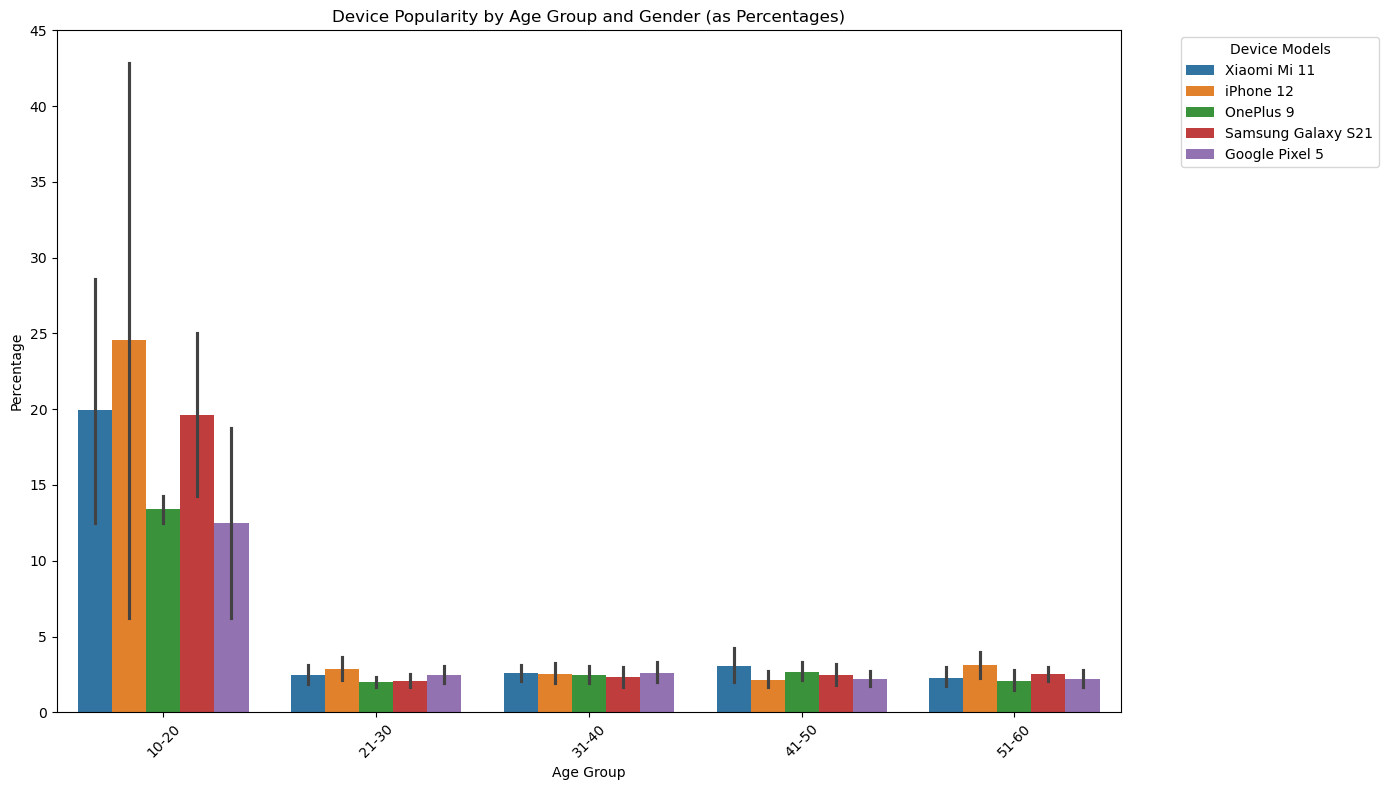

In [143]:
# Ensure the Gender column is properly assigned
most_popular_devices = most_popular_devices.assign(Gender=most_popular_devices['Gender'])

# Group by age group and gender, calculate total counts for each group
group_totals = most_popular_devices.groupby(['age_group', 'Gender'])['Count'].transform('sum')

# Add a new column for percentage contribution within each age and gender group
most_popular_devices['Percentage'] = (most_popular_devices['Count'] / group_totals) * 100

# Display a preview of the refined DataFrame
print(most_popular_devices.head())

# Plot the refined analysis: percentage contributions
plt.figure(figsize=(14, 8))
sns.barplot(
    data=most_popular_devices,
    x='age_group',
    y='Percentage',
    hue='Device Model'
)
plt.title('Device Popularity by Age Group and Gender (as Percentages)')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Device Models', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Interpretation of the Graph:
Overview:

The bar chart shows the popularity of different mobile devices as a percentage within each age group and gender.
Each age group is represented along the x-axis, and the percentage of users for each device is on the y-axis.
The bars are color-coded by device models (e.g., Xiaomi Mi 11, iPhone 12).

Key Observations:

1. 10–20 Age Group:

This group has the most significant variation in device preferences.
The iPhone 12 and Xiaomi Mi 11 are particularly popular, accounting for a large proportion of device usage among both males and females.
The percentages are much higher here compared to older age groups, indicating younger users might have a stronger preference or engagement with their devices.

2. 21–30 and Older Age Groups:

Device usage is more evenly distributed across models.
No single device stands out as dominant in these groups, which suggests a diversification in preferences among older users.

Gender Patterns:

Across all age groups, there doesn't appear to be a stark difference in device preferences between males and females, though younger females seem to have a slightly higher percentage for devices like the iPhone 12.

The bar heights for males and females are closely matched in older age groups.

Patterns and Trends:

The 10–20 age group is the most tech-engaged demographic, with higher device-specific percentages.
As age increases, device preference differences shrink, indicating older demographics might prioritize functionality over brand/model.
### Key Finding: The iPhone 12 consistently performs well, suggesting its appeal across various demographics.

# Most popular Operating system types by user age & gender

In [144]:
# Group by Operating System and Gender and count occurrences
os_summary = df2.groupby(['Operating System', 'Gender', 'Age']).size().reset_index(name='Count')

# Sort by count to find the most popular operating systems
most_popular_os = os_summary.sort_values(by='Count', ascending=False)

# Display the top results
print("Most Popular Operating Systems by Age and Gender:")
print(most_popular_os.head(10))


Most Popular Operating Systems by Age and Gender:
   Operating System  Gender  Age  Count
74          Android    Male   51     16
15          Android  Female   34     12
45          Android    Male   22     11
65          Android    Male   42     11
12          Android  Female   31     11
8           Android  Female   27     11
30          Android  Female   49     11
41          Android    Male   18     10
47          Android    Male   24     10
67          Android    Male   44     10


C:\Users\araba\AppData\Local\Temp\ipykernel_4368\821974178.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = most_popular_os.groupby(['age_group', 'Gender', 'Operating System'], as_index=False)['Count'].sum()
C:\Users\araba\AppData\Local\Temp\ipykernel_4368\821974178.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_data = aggregated_data.pivot_table(


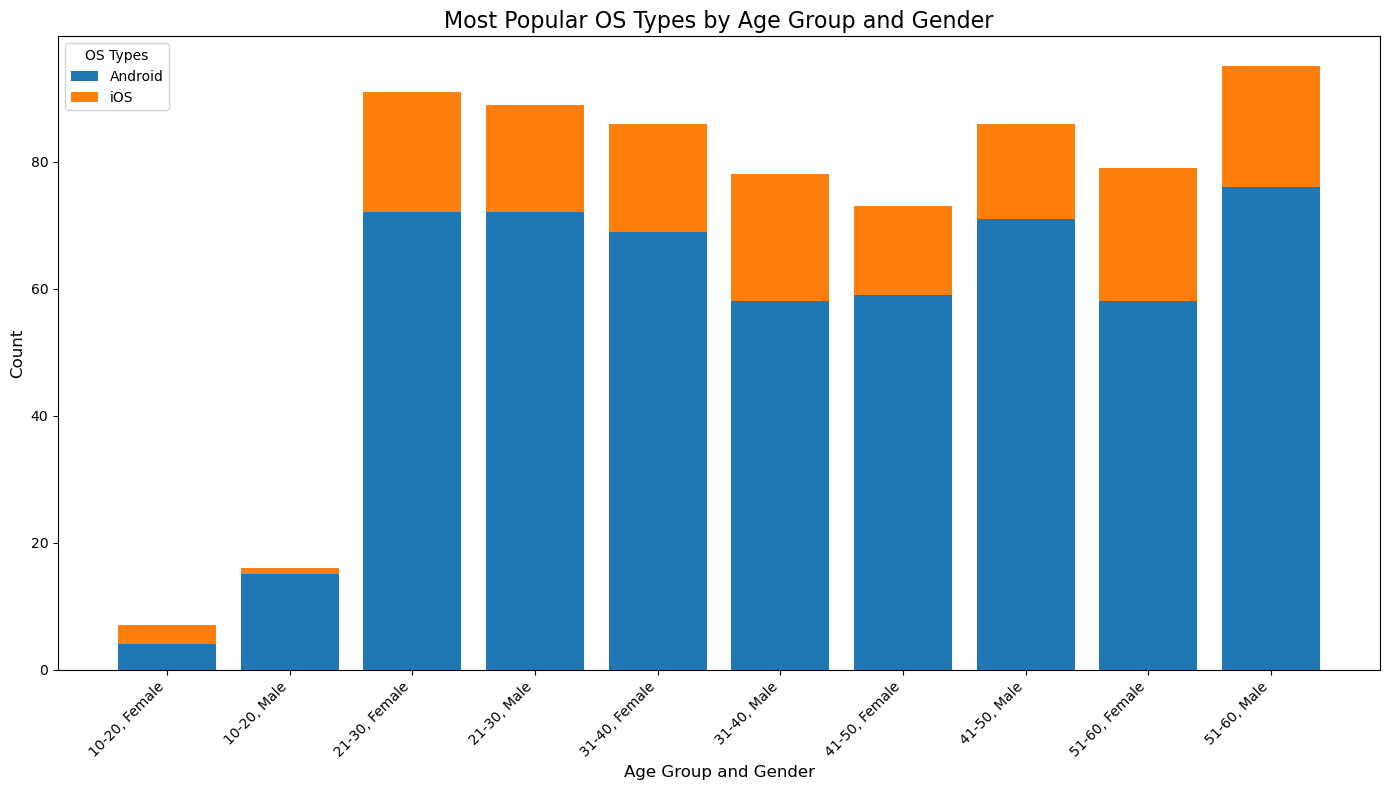

In [145]:
# Bin ages into groups
bins = [10, 20, 30, 40, 50, 60]
labels = ["10-20", "21-30", "31-40", "41-50", "51-60"]
most_popular_os['age_group'] = pd.cut(most_popular_os['Age'], bins=bins, labels=labels, right=False)

# Aggregate data by OS, age group, and gender
aggregated_data = most_popular_os.groupby(['age_group', 'Gender', 'Operating System'], as_index=False)['Count'].sum()

# Pivot data for the bar chart
pivot_data = aggregated_data.pivot_table(
    index=['age_group', 'Gender'],
    columns='Operating System',
    values='Count',
    fill_value=0
)

# Flatten the MultiIndex for easier access
pivot_data.reset_index(inplace=True)

# Stacked bar chart
age_gender_labels = pivot_data['age_group'].astype(str) + ', ' + pivot_data['Gender']
os_types = pivot_data.columns[2:]  # All OS types start from column 2

plt.figure(figsize=(14, 8))

# Create bars for each OS
bottom = None
for os_type in os_types:
    if bottom is None:
        bottom = pivot_data[os_type]
        plt.bar(age_gender_labels, pivot_data[os_type], label=os_type)
    else:
        plt.bar(age_gender_labels, pivot_data[os_type], bottom=bottom, label=os_type)
        bottom += pivot_data[os_type]

# Customize the chart
plt.title('Most Popular OS Types by Age Group and Gender', fontsize=16)
plt.xlabel('Age Group and Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='OS Types')
plt.tight_layout()

# Show the chart
plt.show()

### Interpretation of the Graph: Most Popular OS Types by Age Group and Gender

This graph visualizes the count of mobile operating systems (OS) usage (Android vs. iOS) across different age groups and genders. Below is a detailed interpretation:

### Dominance of Android:

Android consistently dominates across all age groups and genders, indicated by the larger blue bars. This suggests that Android is the most widely used OS among users in the dataset.

iOS Usage:

iOS (orange bars) is present across all age groups but is noticeably smaller than Android usage.

The highest iOS usage appears in younger age groups (e.g., 21–30 females and males), indicating that younger demographics may prefer iPhones.

Gender Trends:

Both genders exhibit similar patterns of OS preference, with Android being dominant and iOS occupying a smaller portion.

The visual balance suggests no drastic gender-specific bias toward one OS type.

Age Group Trends:

The largest counts are concentrated in the 21–30 and 31–40 age groups, reflecting higher smartphone adoption among working-age adults.

Older age groups (41–50, 51–60) also show significant Android usage, though iOS usage declines slightly in these groups.


# How is the rate of battery drain impacted by device model and operating system?

In [146]:
df2.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

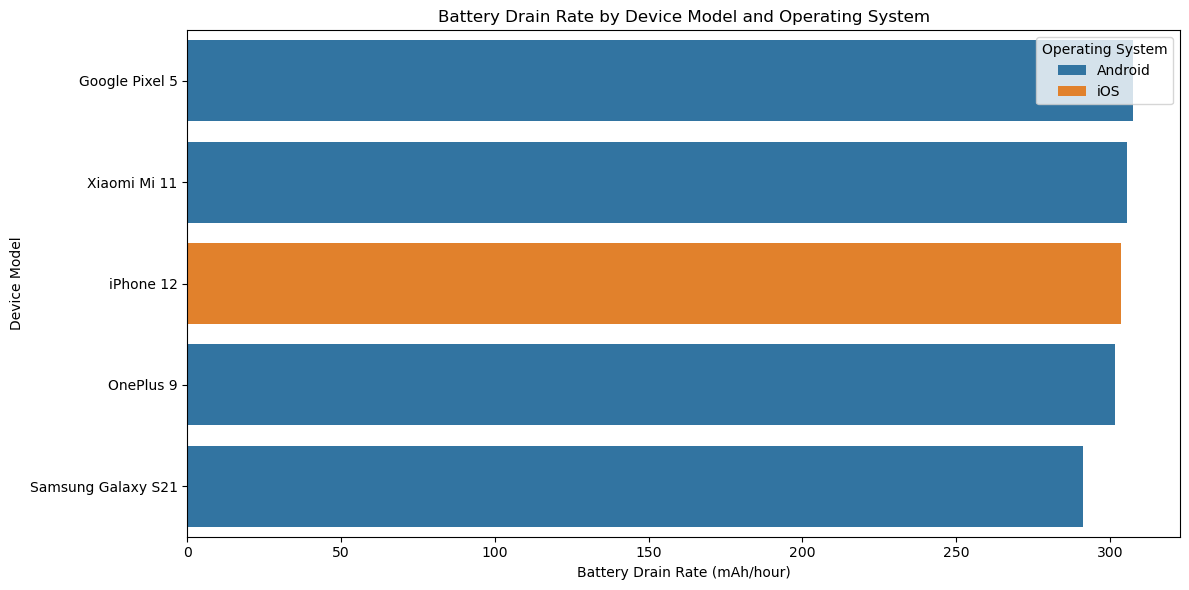

         Device Model Operating System  Battery Drain Rate (mAh/hour)
0      Google Pixel 5          Android                     307.384038
3        Xiaomi Mi 11          Android                     305.549018
4           iPhone 12              iOS                     303.499878
1           OnePlus 9          Android                     301.720749
2  Samsung Galaxy S21          Android                     291.253092


In [147]:
# Step 1: Calculate Battery Drain Rate (mAh/hour)
df2['Battery Drain Rate (mAh/hour)'] = df2['Battery Drain (mAh/day)'] / df2['Screen On Time (hours/day)']

# Step 2: Group by Device Model and Operating System
battery_drain_analysis = (
    df2.groupby(['Device Model', 'Operating System'])['Battery Drain Rate (mAh/hour)']
    .mean()
    .reset_index()
    .sort_values(by='Battery Drain Rate (mAh/hour)', ascending=False)
)

# Step 3: Visualize Results
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(
    x='Battery Drain Rate (mAh/hour)', 
    y='Device Model', 
    hue='Operating System', 
    data=battery_drain_analysis
)
plt.title('Battery Drain Rate by Device Model and Operating System')
plt.xlabel('Battery Drain Rate (mAh/hour)')
plt.ylabel('Device Model')
plt.legend(title='Operating System', loc='upper right')
plt.tight_layout()
plt.show()

# Step 4: Display summary table
print(battery_drain_analysis)


## Interpretation of the Results:

### Bar Chart:

The Google Pixel 5 has the highest battery drain rate among Android devices, at approximately 307.38 mAh/hour.
The Xiaomi Mi 11 follows closely with a drain rate of 305.55 mAh/hour, also running Android.
The iPhone 12, the sole iOS device in the analysis, shows a slightly lower drain rate of 303.50 mAh/hour.
The OnePlus 9 (Android) has a drain rate of 301.72 mAh/hour.
The Samsung Galaxy S21 (Android) has the lowest battery drain rate in this dataset at 291.25 mAh/hour.

Data Table Insights:

Among Android devices, there is a variance in battery performance, with some (Google Pixel 5 and Xiaomi Mi 11) consuming more battery compared to others like the Samsung Galaxy S21.
The iPhone 12, despite running iOS, performs comparably in battery drain rate to Android devices in the upper range, such as the Google Pixel 5 and Xiaomi Mi 11.

### Insights:

Google Pixel 5 and Xiaomi Mi 11 are among the highest battery-draining devices, suggesting either higher power consumption due to performance features or less efficient battery management.

iPhone 12, despite being an iOS device, has a competitive battery drain rate.

Samsung Galaxy S21 shows the best battery performance among the Android devices, indicating superior optimization for power consumption.

# How is the rate of battery drain impacted by app usage time, screen on time, and data usage?

To analyze how the rate of battery drain is impacted by app usage time, screen on time, and data usage, we will use a linear regression model to quantify the relationships between these variables. 

R-squared Score: 0.925031123771819
                      Feature  Coefficient
0    App Usage Time (min/day)     2.342837
1  Screen On Time (hours/day)    91.861682
2         Data Usage (MB/day)     0.163526


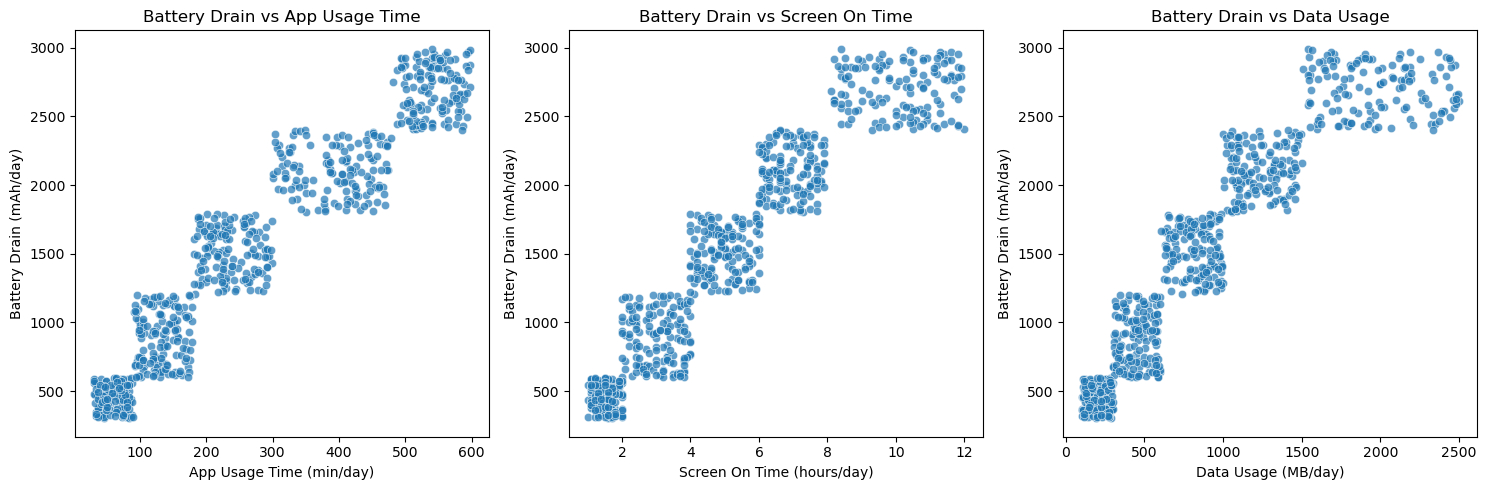

In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Step 1: Load the dataset
# 'df2' is our dataframe

# Step 2: Select relevant columns for analysis
df_analysis = df2[['Battery Drain (mAh/day)', 'App Usage Time (min/day)', 
                   'Screen On Time (hours/day)', 'Data Usage (MB/day)']]

# Step 3: Handle missing values (if any)
df_analysis = df_analysis.dropna()

# Step 4: Define features (X) and target (y)
X = df_analysis[['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Data Usage (MB/day)']]
y = df_analysis['Battery Drain (mAh/day)']

# Step 5: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

# Step 8: Display coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)

# Step 9: Visualize the relationships
plt.figure(figsize=(15, 5))

# Battery Drain vs App Usage Time
plt.subplot(1, 3, 1)
sns.scatterplot(x='App Usage Time (min/day)', y='Battery Drain (mAh/day)', data=df_analysis, alpha=0.7)
plt.title('Battery Drain vs App Usage Time')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Battery Drain (mAh/day)')

# Battery Drain vs Screen On Time
plt.subplot(1, 3, 2)
sns.scatterplot(x='Screen On Time (hours/day)', y='Battery Drain (mAh/day)', data=df_analysis, alpha=0.7)
plt.title('Battery Drain vs Screen On Time')
plt.xlabel('Screen On Time (hours/day)')
plt.ylabel('Battery Drain (mAh/day)')

# Battery Drain vs Data Usage
plt.subplot(1, 3, 3)
sns.scatterplot(x='Data Usage (MB/day)', y='Battery Drain (mAh/day)', data=df_analysis, alpha=0.7)
plt.title('Battery Drain vs Data Usage')
plt.xlabel('Data Usage (MB/day)')
plt.ylabel('Battery Drain (mAh/day)')

plt.tight_layout()
plt.show()


## Interpretation of the linear regression model and the scatter plots:

### 1. Model Insights
R-squared Score (0.93): The model explains 93% of the variance in battery drain, indicating that the predictors (App Usage Time, Screen On Time, and Data Usage) have a strong combined effect on battery drain.

Coefficients:
App Usage Time (2.34 mAh/min): For every additional minute of app usage per day, the battery drain increases by approximately 2.34 mAh/day.

Screen On Time (91.86 mAh/hour): Screen time has the highest impact on battery drain, with every additional hour of screen-on time contributing nearly 92 mAh/day.

Data Usage (0.16 mAh/MB): Data usage has the smallest effect, with every additional MB of data used increasing battery drain by 0.16 mAh/day.

### 2. Scatter Plot Analysis

Battery Drain vs. App Usage Time:

A strong positive correlation is evident; as app usage time increases, battery drain increases linearly. The spread in data suggests consistency in the impact of app usage time on battery drain.

Battery Drain vs. Screen On Time:

This plot shows a steep linear trend, highlighting that screen-on time has a significant and predictable impact on battery consumption.

Battery Drain vs. Data Usage:

While there is a positive trend, the slope is less steep compared to the other features, confirming that data usage has a relatively smaller influence on battery drain.

### 3. Implications
Key Drivers: Screen-on time and app usage are the dominant factors driving battery drain. Optimizing screen brightness or limiting usage duration could significantly improve battery life.

Minor Role of Data Usage: While relevant, data usage contributes minimally compared to the other variables, meaning apps that are heavy on data may not drain the battery solely through data consumption.

# Is battery drain impacted by any other category, like the number of apps or the gender of the user?

C:\Users\araba\AppData\Local\Temp\ipykernel_4368\171137973.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_battery_drain, x='Gender', y='Battery Drain (mAh/day)', palette='viridis')


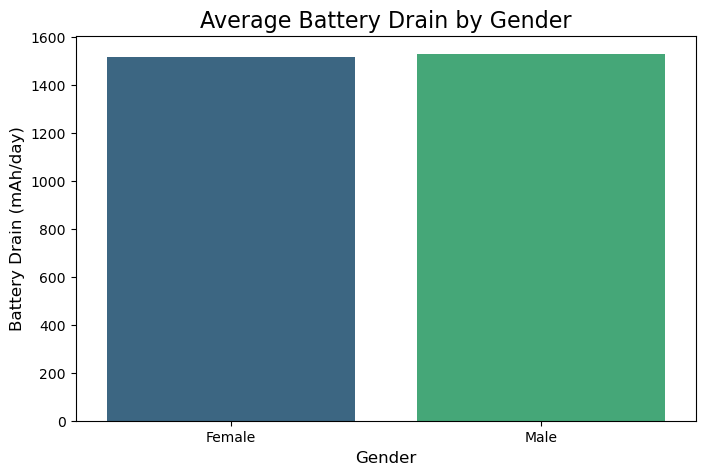

In [149]:
# Step 1: Group data by gender and calculate average battery drain
gender_battery_drain = df2.groupby('Gender')['Battery Drain (mAh/day)'].mean().reset_index()

# Step 2: Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=gender_battery_drain, x='Gender', y='Battery Drain (mAh/day)', palette='viridis')

# Step 3: Add titles and labels
plt.title('Average Battery Drain by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Battery Drain (mAh/day)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Results look similar, so we will proceed to perform a t-test to statistically compare the means of battery drain for male and female users.

In [150]:
from scipy.stats import ttest_ind

# Split data by gender
female_battery = df2[df2['Gender'] == 'Female']['Battery Drain (mAh/day)']
male_battery = df2[df2['Gender'] == 'Male']['Battery Drain (mAh/day)']

# Perform t-test
t_stat, p_value = ttest_ind(female_battery, male_battery, equal_var=False)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The difference in battery drain between genders is statistically significant.")
else:
    print("The difference in battery drain between genders is not statistically significant.")


T-Statistic: -0.16609965270225502
P-Value: 0.8681266441369694
The difference in battery drain between genders is not statistically significant.


### ***Conclusion *** The difference in battery drain between genders is not statistically significant.

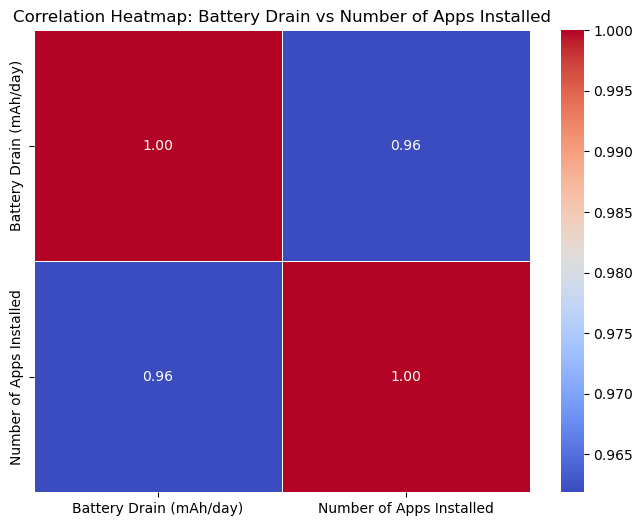

In [151]:
# Selecting relevant columns for correlation
correlation_data = df2[['Battery Drain (mAh/day)', 'Number of Apps Installed']]

# Calculating the correlation matrix
correlation_matrix = correlation_data.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Battery Drain vs Number of Apps Installed')
plt.show()


From the heatmap results, we can interpret the following:

Strong Positive Correlation (0.96): There is a very strong positive correlation between the number of apps installed and the battery drain (0.96). This suggests that as the number of apps installed increases, the battery drain also tends to increase.

### Key Insights:
The high correlation value indicates that the number of apps installed might significantly impact battery usage. This could be because more apps might increase background processes, notifications, and system activity, which can contribute to higher battery consumption. In addition, we already established causation during the exploration of the user behavior class which showed that users in higher classes consume more battery

# Does the users age or gender impact screen on time or number of apps installed?

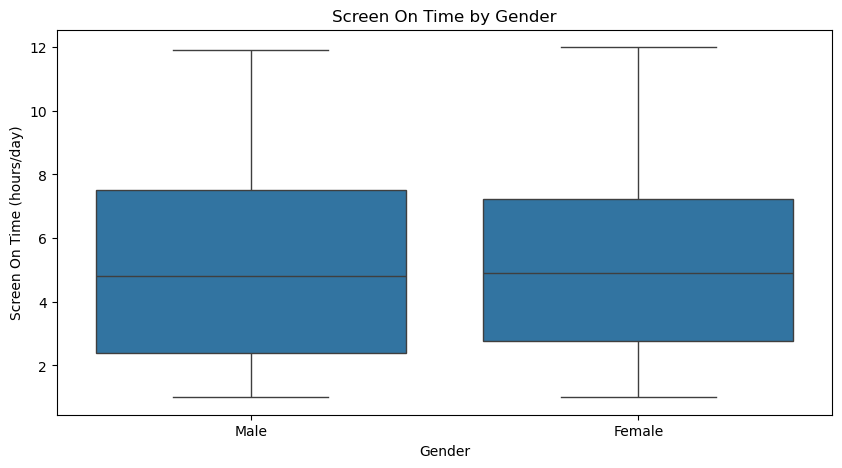

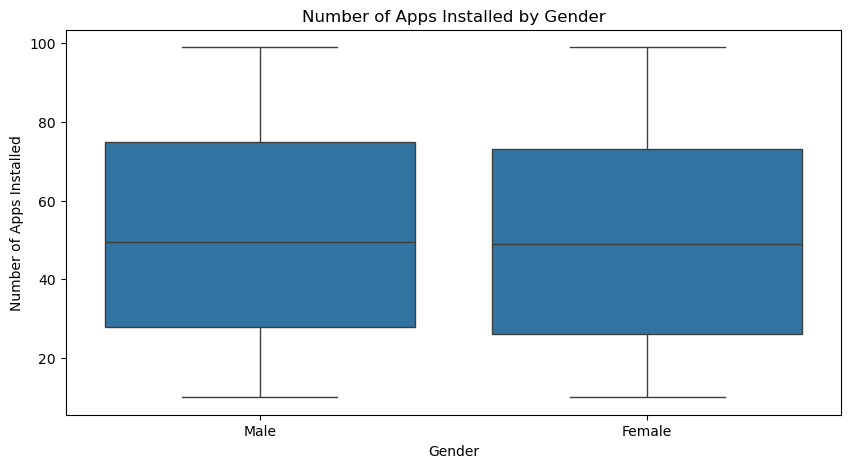

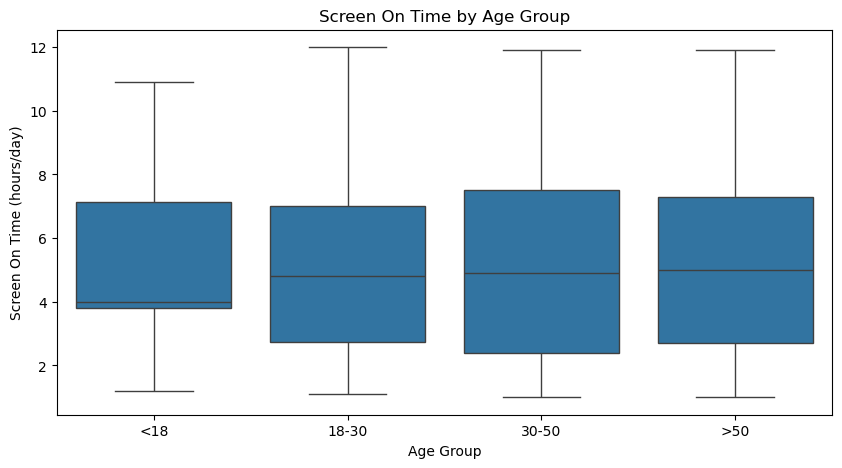

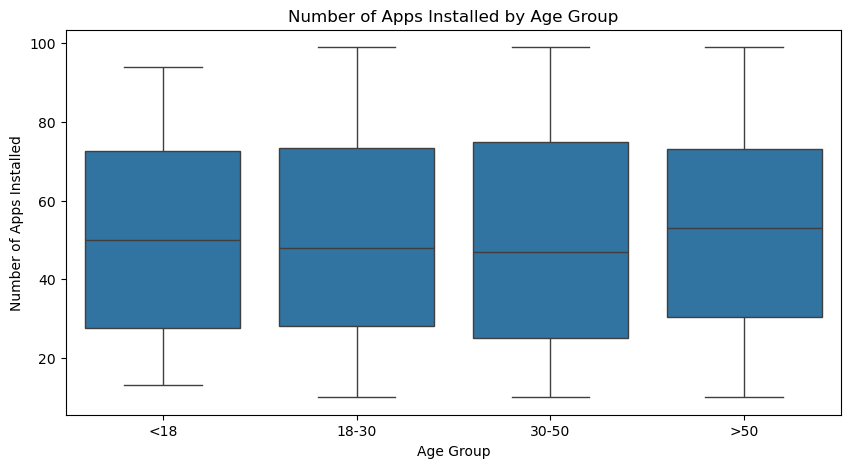

ANOVA Results - Screen On Time by Age Group: p-value = 0.856617832512083
ANOVA Results - Apps Installed by Age Group: p-value = 0.9539042145982057
T-test Results - Screen On Time by Gender: p-value = 0.9248122785055038
T-test Results - Apps Installed by Gender: p-value = 0.6678798537394364


In [152]:
from scipy.stats import f_oneway, ttest_ind
%matplotlib inline

# Ensure the relevant columns are correctly typed
df2['Age'] = pd.to_numeric(df2['Age'], errors='coerce')
df2['Screen On Time (hours/day)'] = pd.to_numeric(df2['Screen On Time (hours/day)'], errors='coerce')
df2['Number of Apps Installed'] = pd.to_numeric(df2['Number of Apps Installed'], errors='coerce')

# Gender-wise analysis
plt.figure(figsize=(10, 5))
sns.boxplot(data=df2, x='Gender', y='Screen On Time (hours/day)')
plt.title('Screen On Time by Gender')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=df2, x='Gender', y='Number of Apps Installed')
plt.title('Number of Apps Installed by Gender')
plt.show()

# Age-wise analysis
# Create age groups
bins = [0, 18, 30, 50, 100]  # Example age groups: <18, 18-30, 30-50, >50
labels = ['<18', '18-30', '30-50', '>50']
df2['Age Group'] = pd.cut(df2['Age'], bins=bins, labels=labels)

plt.figure(figsize=(10, 5))
sns.boxplot(data=df2, x='Age Group', y='Screen On Time (hours/day)')
plt.title('Screen On Time by Age Group')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=df2, x='Age Group', y='Number of Apps Installed')
plt.title('Number of Apps Installed by Age Group')
plt.show()

# Statistical tests
# ANOVA for age groups
anova_screen_time = f_oneway(*[df2.loc[df2['Age Group'] == group, 'Screen On Time (hours/day)'] for group in labels])
anova_apps_installed = f_oneway(*[df2.loc[df2['Age Group'] == group, 'Number of Apps Installed'] for group in labels])

print(f"ANOVA Results - Screen On Time by Age Group: p-value = {anova_screen_time.pvalue}")
print(f"ANOVA Results - Apps Installed by Age Group: p-value = {anova_apps_installed.pvalue}")

# T-test for gender comparison
male_data = df2[df2['Gender'] == 'Male']
female_data = df2[df2['Gender'] == 'Female']

t_test_screen_time = ttest_ind(male_data['Screen On Time (hours/day)'], female_data['Screen On Time (hours/day)'], nan_policy='omit')
t_test_apps_installed = ttest_ind(male_data['Number of Apps Installed'], female_data['Number of Apps Installed'], nan_policy='omit')

print(f"T-test Results - Screen On Time by Gender: p-value = {t_test_screen_time.pvalue}")
print(f"T-test Results - Apps Installed by Gender: p-value = {t_test_apps_installed.pvalue}")


### Graph interpretation 

1. Screen On Time by Age Group
   
Graph: 

The boxplot for screen on time shows similar median values across all age groups, with overlapping interquartile ranges (IQRs). This indicates little variation in screen time among age groups.

ANOVA Result: The p-value is 0.8566, which is much greater than 0.05. This indicates there is no statistically significant difference in screen on time among the different age groups.

Consistency: The graph supports the ANOVA results since the boxplots show no clear difference in screen on time among the groups.

3. Number of Apps Installed by Gender

Graph: The boxplots for males and females are nearly identical, with similar medians and ranges. There doesn’t appear to be a substantial difference in the number of apps installed between genders.

T-test Result: The p-value is 0.6679, which is much greater than 0.05. This suggests there is no statistically significant difference in the number of apps installed between genders.

Consistency: The graph aligns with the t-test results, showing no discernible difference between genders.

5. Screen On Time by Gender
6. 
Graph: The boxplots for males and females are nearly identical, with overlapping medians and IQRs. This suggests that screen on time is similar for both genders.

T-test Result: The p-value is 0.9248, which is much greater than 0.05. This indicates there is no statistically significant difference in screen on time between genders.

Consistency: The graph and t-test results are consistent, both indicating no significant difference.

8. Number of Apps Installed by Age Group
   
Graph: The boxplots show similar medians and overlapping IQRs for all age groups. This suggests that the number of apps installed does not vary significantly with age.

ANOVA Result: The p-value is 0.9539, which is much greater than 0.05. This indicates there is no statistically significant difference in the number of apps installed across age groups.

Consistency: The graph is consistent with the ANOVA results, showing no clear variation among age groups.

### Overall Conclusion:
Across all groups (age and gender), the graphs show no substantial differences, and the statistical tests (ANOVA and t-tests) confirm these observations with high p-values. This suggests that the factors studied (screen on time and number of apps installed) are not significantly influenced by age group or gender in your data.

### Interpretation of Results:

The p-values for all tests are well above the common significance threshold of 0.05, indicating that:

Screen On Time does not vary significantly across different age groups or between genders.

Number of Apps Installed does not vary significantly across different age groups or between genders.

### Conclusion:

Based on these results, age and gender do not appear to significantly impact screen-on time or the number of apps installed in your dataset.

# Based on our findings, here are some recommendations for Apple (iOS) and Google (Android) to improve the appeal of their devices running their respective operating systems:

### Recommendations for Apple (iOS):

Focus on Younger Demographics:

Since younger age groups (e.g., 21–30) have the highest iOS usage, Apple should focus on marketing strategies tailored to younger audiences. This could include promoting features that resonate with younger users, such as seamless integration with social media, gaming capabilities, and student discounts.

Affordable iPhone Options:

The dominance of Android suggests affordability plays a significant role in choice of OS. Apple could consider expanding its lineup of budget-friendly iPhones to attract cost-conscious users in age groups or regions where Android dominates.

Battery Optimization:

iPhone 12 shows competitive battery performance. Apple should continue to emphasize efficient battery management across all devices and market it aggressively, addressing any lingering concerns about battery life in iOS devices.

App Usage Insights:

Given the strong correlation between app usage time and user behavior, Apple could offer personalized app usage insights and recommendations to users, highlighting its focus on health and productivity.


### Recommendations for Google (Android):

Leverage Dominance Across Demographics:

Android’s broad appeal across all age groups and genders indicates its ability to reach diverse users. Google could further strengthen this position by offering localized and culturally relevant features or apps to appeal to different regions and demographics.

Battery Efficiency Improvements:

Devices like Google Pixel 5 and Xiaomi Mi 11 show high battery drain. Google should focus on optimizing battery efficiency for Android, possibly by working with manufacturers to implement better hardware-software integration, similar to Apple’s approach.

Highlight Samsung Galaxy S21’s Battery Efficiency:

As Samsung Galaxy S21 demonstrates superior battery performance among Android devices, Google can collaborate with manufacturers like Samsung to showcase these optimized devices as examples of Android’s capabilities.

Customization and Affordability:

Android’s affordability is likely a key driver of its dominance. Google could continue to invest in partnerships with device manufacturers to offer feature-rich yet affordable devices, particularly in price-sensitive markets.

Battery Management Solutions:

Given the strong correlation between the number of apps installed and battery drain, Google could enhance Android’s battery management system to better control background app activity and provide users with actionable recommendations for optimizing battery life.
